# Unsupervised Learning - **Anomaly Detection**

- What is it ?
    - Identifies data points/events that deviate from norm
    - The output will generate minority class
    - Used to predict: fraud, errors, system failures, unusual patterns, etc...
- Anamoly Detection vs Outlier Treatment 
    - Outlier Treatment: removing/handling outliers based on a single feature 
    - Anamoly Detection: identifying patterns using multifeature analysis
- ML Approaches     
    - Supervised Algorithms: requires labeled data(target) (eg: fraud/no fraud)
    - Unsupervised Algorithms: no target, lack of human ability to identify anomalies - that's why we use the machine

### **Using Clustering-Classification Algorithm (kNN)**
- kNN = k-Nearest Neighbor
- It can be used for both Classification and Anomaly Detection
- Steps:
    1. Deploy the kNN Model (choose a k-value)
    2. Calculate the distances between data points and indices of the nearest neighbors from the model output
    3. Calculate the mean of the k-distances of each observation 
    4. Plot the data 
    5. Visually determine the cutoff point
    6. Use the cutoff point to identify outliers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotx                                 # new modern library for visualization

from sklearn.datasets import load_iris          # dataset
from sklearn.neighbors import NearestNeighbors

In [2]:
iris_data = load_iris()

In [3]:
iris_data.feature_names[:2]

['sepal length (cm)', 'sepal width (cm)']

In [4]:
df = pd.DataFrame(iris_data.data[:,:2],                    #gives first 2 columns 
                  columns=iris_data.feature_names[:2])      
df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

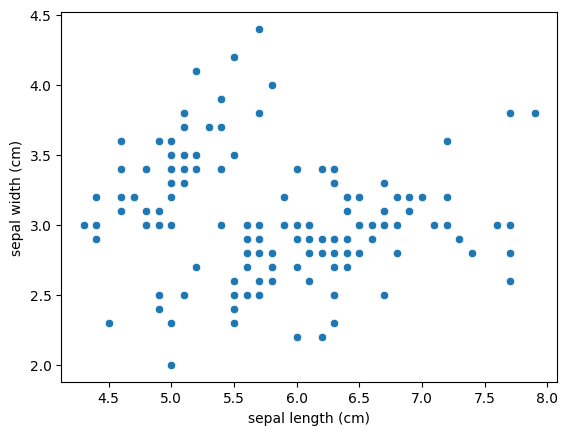

In [5]:
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)')

>Goal: Determine the Anamolies 

Step 1:

In [6]:
knn_model = NearestNeighbors(n_neighbors=3)

#fit the model
knn_model.fit(df)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",3
,"radius radius: float, default=1.0Range of parameter space to use by default for :meth:`radius_neighbors`queries.",1.0
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"p p: float (positive), default=2Parameter for the Minkowski metric fromsklearn.metrics.pairwise.pairwise_distances. When p = 1, this isequivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.",2
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None


Step 2:

In [7]:
distances, indices = knn_model.kneighbors(df)

Step 3:

In [8]:
mean_dist = distances.mean(axis=1)
mean_dist[:10]

array([0.03333333, 0.06666667, 0.03333333, 0.08047379, 0.06666667,
       0.06666667, 0.13333333, 0.03333333, 0.08047379, 0.03333333])

Step 4:

Text(0, 0.5, 'Average Distances')

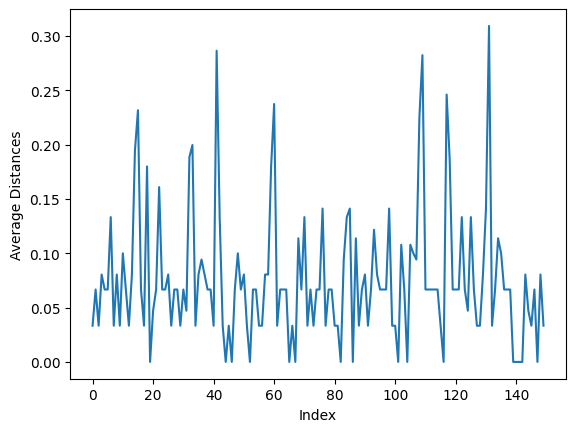

In [9]:
plt.plot(mean_dist)
plt.xlabel('Index')
plt.ylabel('Average Distances')

- The plot above shows the data points that have the highest average distance with neighboring points 
- We can see the peaks that represent highest average average distances --> outlier/anomaly 
- It seems that **0.15 is a good threshold** to spot the outliers and slpit the data between minority and majority
- We can get the index of said anomalies using the threshold and use them to filter
- The **Bottom peaks are more frequent than Top peaks** therefore, we won't take them as Outliers

Text(0, 0.5, 'Average Distances')

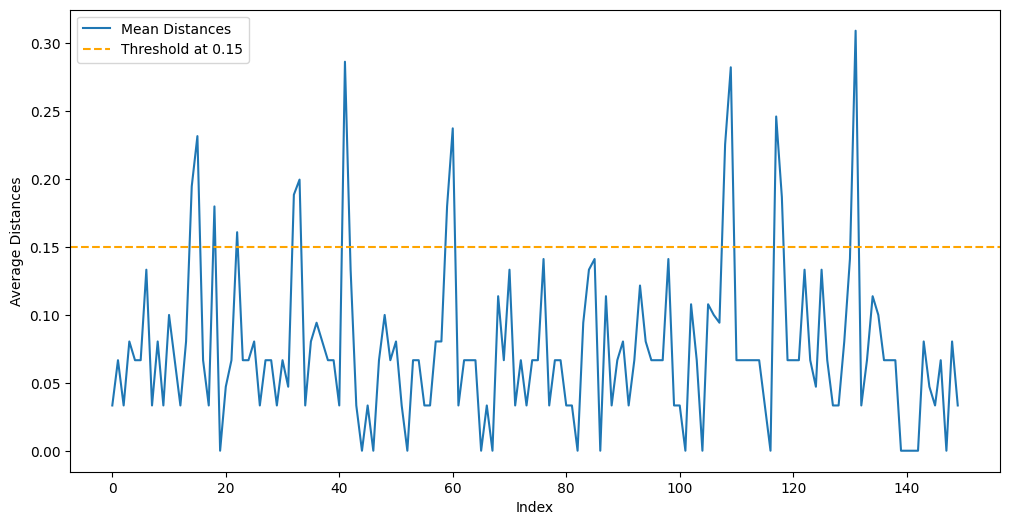

In [10]:
plt.figure(figsize=(12,6))
plt.plot(mean_dist, label='Mean Distances')

plt.axhline(y=0.15, color='orange', linestyle='--', label=f'Threshold at 0.15')

plt.legend()
plt.xlabel('Index')
plt.ylabel('Average Distances')


In [11]:
threshold = 0.15

# get the indices of the anamolies
anomaly_indices = list(np.where(mean_dist > threshold)[0])      #the [0] is very crucial
anomaly_indices

[np.int64(14),
 np.int64(15),
 np.int64(18),
 np.int64(22),
 np.int64(32),
 np.int64(33),
 np.int64(41),
 np.int64(59),
 np.int64(60),
 np.int64(108),
 np.int64(109),
 np.int64(117),
 np.int64(118),
 np.int64(131)]

In [12]:
df['kNN Anamoly'] = np.where(df.index.isin(anomaly_indices),1,0)     # true and false
df.tail()

,sepal length (cm),sepal width (cm),kNN Anamoly
145,6.7,3.0,0
146,6.3,2.5,0
147,6.5,3.0,0
148,6.2,3.4,0
149,5.9,3.0,0


In [13]:
df['kNN Anamoly'].unique()

array([0, 1])

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

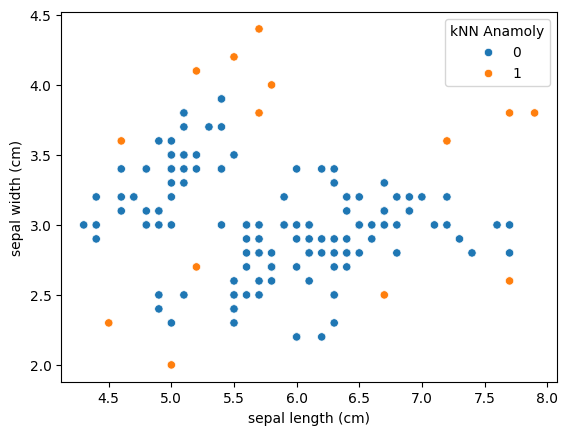

In [14]:
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='kNN Anamoly')

## Using PyOD
- run `pip install pyod`
- PyOD is an open-source python library dedicated to anamoly detection with over 25 algorithms
- The following are the most popular:
    1. **Isolation Forest (IForest)**: identifies anamolies based on a tree structure
    2. **Angle-Based Outlier Detection (ABOD)**: identifies anamolies based on angles between data points in multi-dim feature space
    3. **One-class SVM (OCSVM)**: identifies anamolies based on the hyperplane that separates data points from extreme ones 

#### Data Prep
- Standardize the data 
- Perform Dimensionality Reduction

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [16]:
#get all the columns 
X = iris_data.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [17]:
SS = StandardScaler()
X_scaled = SS.fit_transform(X)

In [18]:
# for visualization purposes
pca_model = PCA(n_components=2)   #2 cuz, we need it for x-axis and y-axis

X_pca = pca_model.fit_transform(X_scaled)

#### IForest Model

In [19]:
from pyod.models.iforest import IForest

In [20]:
iforest_model = IForest(contamination=0.15, random_state=10)

In [21]:
#fit model
iforest_model.fit(X_scaled)

iforest_pred = iforest_model.predict(X_scaled)
iforest_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

> 1s are the anomalies 

In [22]:
df_pca = pd.DataFrame({
    'PC1': X_pca[:,0],              #all rows, but column 1
    'PC2': X_pca[:,1],              #all rows, but column 2
    'IFOREST Anomaly Pred': iforest_pred
})

df_pca.head()

,PC1,PC2,IFOREST Anomaly Pred
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


<Axes: xlabel='PC1', ylabel='PC2'>

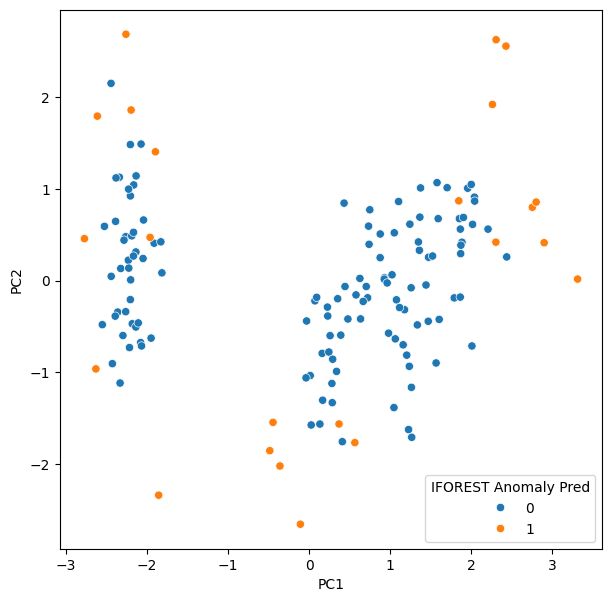

In [23]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='IFOREST Anomaly Pred')

If we look at the Orange data points - then we may ask, why are they considered anomalies even when they are close to our normal data points
so the answer is that - PCA converted this into 2D but what if there was a depth in it too, but we can't see it cuz its 2D
- So, it can be a **Anomaly in Multi-dimension**

Comparing both the models side by side:

In [24]:
df = pd.DataFrame(X, columns=iris_data.feature_names)

df['kNN_Anamoly'] = np.where(df.index.isin(anomaly_indices), 1, 0)
df['IForest Anomaly'] = iforest_pred
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),kNN_Anamoly,IForest Anomaly
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [25]:
#optional - visualizing anomaly in multi-dimension (3D) as stated above 

import plotly.express as px
fig = px.scatter_3d(df, x='sepal length (cm)', y='sepal width (cm)', z='petal width (cm)', color='IForest Anomaly')
fig.show()

In [26]:
import sys
print(sys.executable)
print(sys.path)

/home/vinayakgaur07/ml_clean/bin/python
['/usr/lib/python312.zip', '/usr/lib/python3.12', '/usr/lib/python3.12/lib-dynload', '', '/home/vinayakgaur07/ml_clean/lib/python3.12/site-packages']


### **ABOD Model** 

In [27]:
from pyod.models.abod import ABOD

abod_model = ABOD(contamination=0.12)

In [28]:
abod_model.fit(X_scaled)
abod_pred = abod_model.predict(X_scaled)

In [29]:
df['ABOD Anomaly'] = abod_pred

In [30]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'kNN_Anamoly', 'IForest Anomaly', 'ABOD Anomaly'],
      dtype='str')

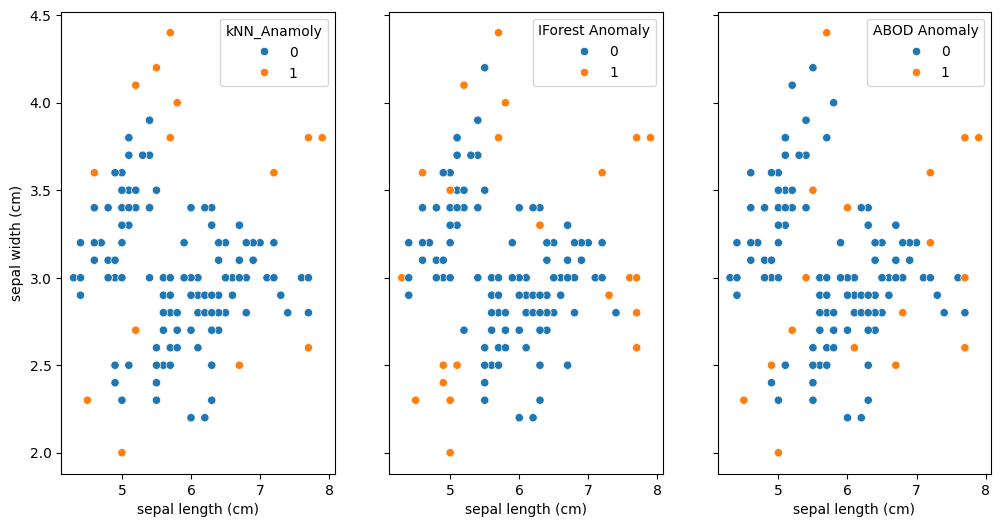

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,6), sharey=True)     #all the plots shared 'y-axis'

#plot the scatterplot for all 3 models 
plot0 = sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='kNN_Anamoly', ax=axes[0])
plot1 = sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='IForest Anomaly', ax=axes[1])
plot2 = sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='ABOD Anomaly', ax=axes[2])